In [1]:
%pip install duckdb pandas pyarrow matplotlib jupyter plotly scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import sys, platform
import duckdb, pandas as pd, pyarrow as pa
import matplotlib

print("Python:", sys.version.split()[0])
print("OS:", platform.platform())
print("duckdb:", duckdb.__version__)
print("pandas:", pd.__version__)
print("pyarrow:", pa.__version__)
print("matplotlib:", matplotlib.__version__)


Python: 3.13.5
OS: Windows-11-10.0.26100-SP0
duckdb: 1.3.2
pandas: 2.3.2
pyarrow: 21.0.0
matplotlib: 3.10.5


In [3]:
from pathlib import Path

# Current folder (where your .ipynb and parquet files are)
PROJECT = Path.cwd()

# If your parquet files are in the same folder, just point here:
DATA = PROJECT
OUT = PROJECT / "outputs"

# Make sure outputs/ exists for saving charts/tables later
OUT.mkdir(exist_ok=True)

PROJECT, DATA, OUT


(WindowsPath('c:/Users/Hasintha Sri/Desktop/Big Data Assignment'),
 WindowsPath('c:/Users/Hasintha Sri/Desktop/Big Data Assignment'),
 WindowsPath('c:/Users/Hasintha Sri/Desktop/Big Data Assignment/outputs'))

In [4]:
import pandas as pd

pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)

print("Pandas display options set.")


Pandas display options set.


### Step 1: Import libraries


* duckdb → lets us query Parquet files directly with SQL (fast and memory-efficient).

In [5]:
import duckdb
import pandas as pd


### Step 2: Register all 4 Parquet files

In [6]:
# List of your parquet files
files = [
    "yellow_tripdata_2025-01.parquet",
    "yellow_tripdata_2025-02.parquet",
    "yellow_tripdata_2025-03.parquet",
    "yellow_tripdata_2025-04.parquet"
]

# Create a DuckDB in-memory connection
con = duckdb.connect(database=":memory:")

# Register them as one virtual table
con.execute("""
    CREATE OR REPLACE TABLE yellow_2025 AS
    SELECT * FROM read_parquet($files)
""", {"files": files})


In [7]:
# Preview each parquet file before merging
for file in files:
    df_preview = pd.read_parquet(DATA / file)
    print(f"Preview of {file}:")
    display(df_preview.head())

Preview of yellow_tripdata_2025-01.parquet:


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,1,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.60,1.0,N,229,237,1,10.0,3.5,0.5,3.00,0.0,1.0,18.00,2.5,0.0,0.0
1,1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.50,1.0,N,236,237,1,5.1,3.5,0.5,2.02,0.0,1.0,12.12,2.5,0.0,0.0
2,1,2025-01-01 00:44:04,2025-01-01 00:46:01,1.0,0.60,1.0,N,141,141,1,5.1,3.5,0.5,2.00,0.0,1.0,12.10,2.5,0.0,0.0
3,2,2025-01-01 00:14:27,2025-01-01 00:20:01,3.0,0.52,1.0,N,244,244,2,7.2,1.0,0.5,0.00,0.0,1.0,9.70,0.0,0.0,0.0
4,2,2025-01-01 00:21:34,2025-01-01 00:25:06,3.0,0.66,1.0,N,244,116,2,5.8,1.0,0.5,0.00,0.0,1.0,8.30,0.0,0.0,0.0


Preview of yellow_tripdata_2025-02.parquet:


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,2,2025-02-01 00:12:18,2025-02-01 00:32:33,3.0,3.12,1.0,N,246,79,1,19.8,1.00,0.5,5.11,0.0,1.0,30.66,2.5,0.0,0.75
1,2,2025-02-01 00:40:04,2025-02-01 00:49:15,1.0,1.40,1.0,N,114,79,1,10.0,1.00,0.5,3.15,0.0,1.0,18.90,2.5,0.0,0.75
2,1,2025-02-01 00:06:09,2025-02-01 00:11:51,0.0,0.40,1.0,N,211,144,1,6.5,4.25,0.5,1.00,0.0,1.0,13.25,2.5,0.0,0.75
3,1,2025-02-01 00:15:13,2025-02-01 00:20:19,0.0,0.70,1.0,N,113,249,1,7.2,4.25,0.5,2.00,0.0,1.0,14.95,2.5,0.0,0.75
4,2,2025-02-01 00:02:52,2025-02-01 00:20:25,1.0,4.19,1.0,N,113,263,1,19.8,1.00,0.5,5.11,0.0,1.0,30.66,2.5,0.0,0.75


Preview of yellow_tripdata_2025-03.parquet:


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,1,2025-03-01 00:17:16,2025-03-01 00:25:52,1.0,0.90,1.0,N,140,236,1,7.9,3.50,0.5,2.60,0.0,1.0,15.50,2.5,0.0,0.00
1,1,2025-03-01 00:37:38,2025-03-01 00:43:51,1.0,0.60,1.0,N,140,262,1,6.5,3.50,0.5,2.30,0.0,1.0,13.80,2.5,0.0,0.00
2,2,2025-03-01 00:24:35,2025-03-01 00:39:49,1.0,1.94,1.0,N,161,68,1,14.9,1.00,0.5,5.16,0.0,1.0,25.81,2.5,0.0,0.75
3,2,2025-03-01 00:56:16,2025-03-01 01:01:35,2.0,0.95,1.0,N,231,13,1,7.2,1.00,0.5,2.59,0.0,1.0,15.54,2.5,0.0,0.75
4,1,2025-03-01 00:01:44,2025-03-01 00:10:00,1.0,1.50,1.0,N,163,236,1,8.6,4.25,0.5,2.85,0.0,1.0,17.20,2.5,0.0,0.75


Preview of yellow_tripdata_2025-04.parquet:


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,1,2025-04-01 00:47:06,2025-04-01 01:13:25,1.0,9.50,1.0,N,138,230,1,38.7,11.00,0.5,11.65,6.94,1.0,69.79,2.5,1.75,0.75
1,2,2025-04-01 00:27:35,2025-04-01 00:38:19,2.0,3.77,1.0,N,138,92,1,17.0,6.00,0.5,4.90,0.00,1.0,31.15,0.0,1.75,0.00
2,2,2025-04-01 00:24:07,2025-04-01 00:35:12,1.0,5.41,1.0,N,132,130,1,22.6,1.00,0.5,5.37,0.00,1.0,32.22,0.0,1.75,0.00
3,1,2025-04-01 00:56:30,2025-04-01 01:00:49,2.0,0.60,1.0,N,79,4,1,6.5,4.25,0.5,2.45,0.00,1.0,14.70,2.5,0.00,0.75
4,2,2025-04-01 00:00:17,2025-04-01 00:16:19,1.0,0.43,1.0,N,161,229,2,4.4,1.00,0.5,0.00,0.00,1.0,10.15,2.5,0.00,0.75


### Step 3: Count rows per file (month)

In [8]:
row_counts = con.execute("""
    SELECT
      strftime(tpep_pickup_datetime, '%Y-%m') AS month,
      COUNT(*) AS trips
    FROM yellow_2025
    GROUP BY month
    ORDER BY month
""").fetchdf()

row_counts


,month,trips
0,2007-12,1
1,2009-01,1
2,2024-12,21
3,2025-01,3475234
4,2025-02,3577542
5,2025-03,4145229
6,2025-04,3970548
7,2025-05,3


### Step 4: Peek at the schema (columns)

In [9]:
schema = con.execute("DESCRIBE yellow_2025").fetchdf()
schema


,column_name,column_type,null,key,default,extra
0,VendorID,INTEGER,YES,None,None,None
1,tpep_pickup_datetime,TIMESTAMP,YES,None,None,None
2,tpep_dropoff_datetime,TIMESTAMP,YES,None,None,None
3,passenger_count,BIGINT,YES,None,None,None
4,trip_distance,DOUBLE,YES,None,None,None
5,RatecodeID,BIGINT,YES,None,None,None
6,store_and_fwd_flag,VARCHAR,YES,None,None,None
7,PULocationID,INTEGER,YES,None,None,None
8,DOLocationID,INTEGER,YES,None,None,None
9,payment_type,BIGINT,YES,None,None,None


### Cleaned Table with Derived Columns

In [10]:
# Create cleaned table with derived columns
con.execute("""
    CREATE OR REPLACE TABLE yellow_clean AS
    SELECT
        *,
        DATE(tpep_pickup_datetime) AS pickup_date,
        strftime(tpep_pickup_datetime, '%Y-%m') AS pickup_month,
        EXTRACT(HOUR FROM tpep_pickup_datetime)::INT AS pickup_hour,
        (epoch(tpep_dropoff_datetime) - epoch(tpep_pickup_datetime)) / 60 AS trip_duration_min,
        CASE 
            WHEN fare_amount > 0 AND payment_type = 1 THEN tip_amount / fare_amount
            ELSE NULL
        END AS tip_pct
    FROM yellow_2025
    WHERE strftime(tpep_pickup_datetime, '%Y-%m') IN ('2025-01','2025-02','2025-03','2025-04')
""")

In [11]:
# Get basic info about yellow_clean table
yellow_clean_info = con.execute("""
    SELECT COUNT(*) AS row_count FROM yellow_clean
""").fetchdf()
yellow_clean_columns = con.execute("""
    PRAGMA table_info('yellow_clean')
""").fetchdf()

print("Row count in yellow_clean:", yellow_clean_info.iloc[0, 0])
print("Columns in yellow_clean:")
display(yellow_clean_columns[["name", "type"]])

Row count in yellow_clean: 15168553
Columns in yellow_clean:


,name,type
0,VendorID,INTEGER
1,tpep_pickup_datetime,TIMESTAMP
2,tpep_dropoff_datetime,TIMESTAMP
3,passenger_count,BIGINT
4,trip_distance,DOUBLE
...,...,...
20,pickup_date,DATE
21,pickup_month,VARCHAR
22,pickup_hour,INTEGER
23,trip_duration_min,DOUBLE


### Basic quality checks on derived columns

In [12]:
print("\nDerived column sanity checks:")
print(
    con.execute("""
        SELECT 
            MIN(pickup_date) AS first_date,
            MAX(pickup_date) AS last_date,
            AVG(trip_distance) AS avg_distance,
            AVG(trip_duration_min) AS avg_duration_min
        FROM yellow_clean
    """).df()
)


Derived column sanity checks:
  first_date  last_date  avg_distance  avg_duration_min
0 2025-01-01 2025-04-30      6.392799         15.796826


# TOPIC 4 — EDA (Exploratory Data Analysis)

In [13]:
import plotly.express as px
import plotly.graph_objects as go


### 4.1 Monthly summary (trips, distance, duration, fare)

Monthly summary:


,pickup_month,trips,avg_distance_miles,avg_duration_min,avg_fare_usd
0,2025-01,3475234,5.86,15.0,17.08
1,2025-02,3577542,6.03,15.4,16.75
2,2025-03,4145229,6.58,16.0,17.80
3,2025-04,3970548,6.99,16.6,17.97


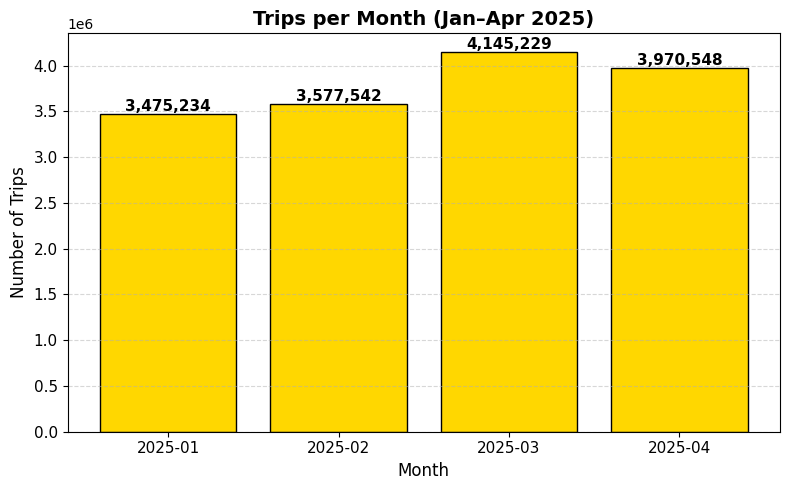

In [14]:
import matplotlib.pyplot as plt

eda_monthly = con.execute("""
    SELECT pickup_month,
           COUNT(*) AS trips,
           ROUND(AVG(trip_distance),2) AS avg_distance_miles,
           ROUND(AVG(trip_duration_min),1) AS avg_duration_min,
           ROUND(AVG(fare_amount),2) AS avg_fare_usd
    FROM yellow_clean
    GROUP BY pickup_month
    ORDER BY pickup_month
""").df()

print("Monthly summary:")
display(eda_monthly)

plt.figure(figsize=(8, 5))
bars = plt.bar(eda_monthly["pickup_month"], eda_monthly["trips"], color="gold", edgecolor="black")

plt.title("Trips per Month (Jan–Apr 2025)", fontsize=14, fontweight="bold")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Trips", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Add value labels on top of bars
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{int(bar.get_height()):,}",
        ha="center", va="bottom", fontsize=11, fontweight="bold"
    )

plt.tight_layout()
plt.show()

### 4.2 Daily trends

In [15]:
eda_daily = con.execute("""
    SELECT 
        pickup_date,
        COUNT(*) AS trips,
        ROUND(AVG(fare_amount), 2) AS avg_fare_usd,
        ROUND(AVG(trip_distance), 2) AS avg_distance_miles,
        ROUND(AVG(trip_duration_min), 1) AS avg_duration_min
    FROM yellow_clean
    GROUP BY pickup_date
    ORDER BY pickup_date
""").df()

eda_daily

,pickup_date,trips,avg_fare_usd,avg_distance_miles,avg_duration_min
0,2025-01-01,90188,17.66,6.43,15.5
1,2025-01-02,84832,19.10,3.68,16.8
2,2025-01-03,91250,18.17,6.00,15.9
3,2025-01-04,97804,17.62,3.24,15.0
4,2025-01-05,79624,19.05,3.82,14.7
...,...,...,...,...,...
115,2025-04-26,158506,17.45,9.82,16.4
116,2025-04-27,141509,18.77,8.10,15.8
117,2025-04-28,110105,19.38,12.17,17.6
118,2025-04-29,126466,18.45,4.07,17.5


Daily trends (head):


,pickup_date,trips,avg_fare_usd,avg_distance_miles,avg_duration_min
0,2025-01-01,90188,17.66,6.43,15.5
1,2025-01-02,84832,19.10,3.68,16.8
2,2025-01-03,91250,18.17,6.00,15.9
3,2025-01-04,97804,17.62,3.24,15.0
4,2025-01-05,79624,19.05,3.82,14.7


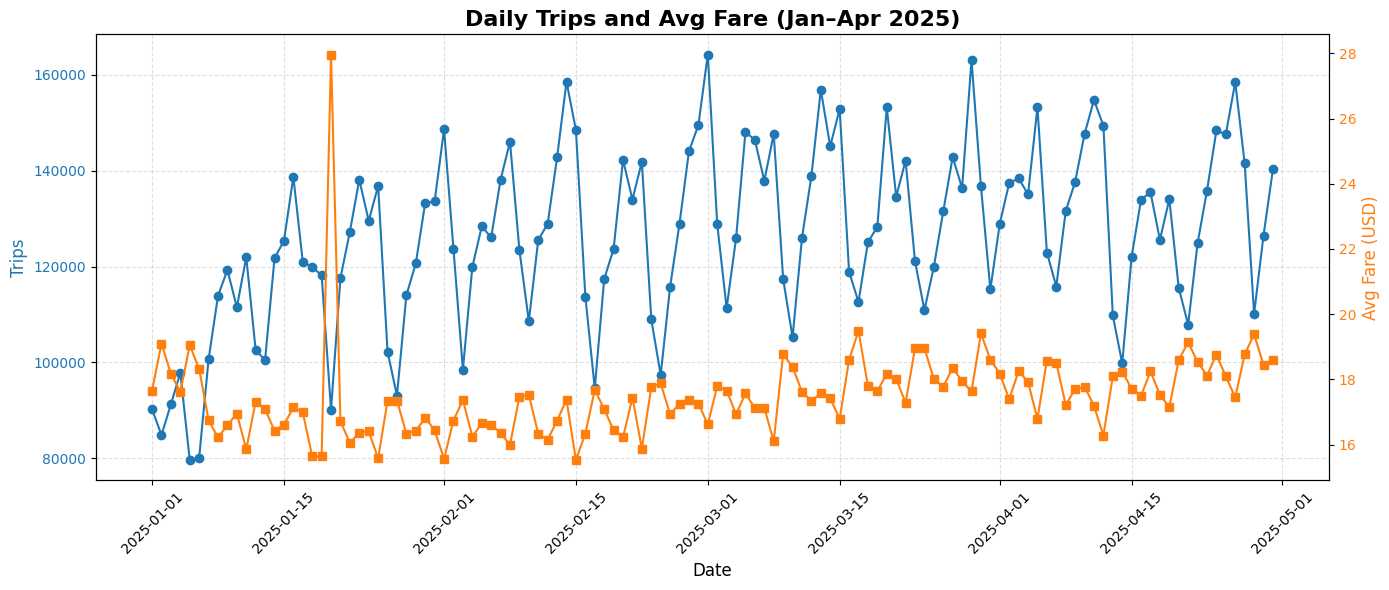

In [16]:
eda_daily = con.execute("""
    SELECT 
        pickup_date,
        COUNT(*) AS trips,
        ROUND(AVG(fare_amount), 2) AS avg_fare_usd,
        ROUND(AVG(trip_distance), 2) AS avg_distance_miles,
        ROUND(AVG(trip_duration_min), 1) AS avg_duration_min
    FROM yellow_clean
    GROUP BY pickup_date
    ORDER BY pickup_date
""").df()

print("Daily trends (head):")
display(eda_daily.head())

fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot daily trips
color1 = "tab:blue"
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Trips", color=color1, fontsize=12)
ax1.plot(eda_daily["pickup_date"], eda_daily["trips"], color=color1, marker="o", label="Trips")
ax1.tick_params(axis="y", labelcolor=color1)
ax1.grid(True, linestyle="--", alpha=0.4)
plt.xticks(rotation=45, fontsize=10)

# Create a second y-axis for average fare
ax2 = ax1.twinx()
color2 = "tab:orange"
ax2.set_ylabel("Avg Fare (USD)", color=color2, fontsize=12)
ax2.plot(eda_daily["pickup_date"], eda_daily["avg_fare_usd"], color=color2, marker="s", label="Avg Fare (USD)")
ax2.tick_params(axis="y", labelcolor=color2)

# Title and layout
plt.title("Daily Trips and Avg Fare (Jan–Apr 2025)", fontsize=16, fontweight="bold")
fig.tight_layout()
plt.show()


### 4.3 Hour-of-Day Profile

Hour-of-day profile:


,pickup_hour,trips,avg_duration_min,avg_distance_miles
0,0,454323,14.0,5.52
1,1,299421,13.2,4.95
2,2,195910,12.5,5.32
3,3,134744,12.6,5.80
4,4,102568,14.3,11.43
...,...,...,...,...
19,19,982721,14.7,5.18
20,20,905556,14.3,6.52
21,21,932437,14.4,5.19
22,22,860054,14.7,5.29


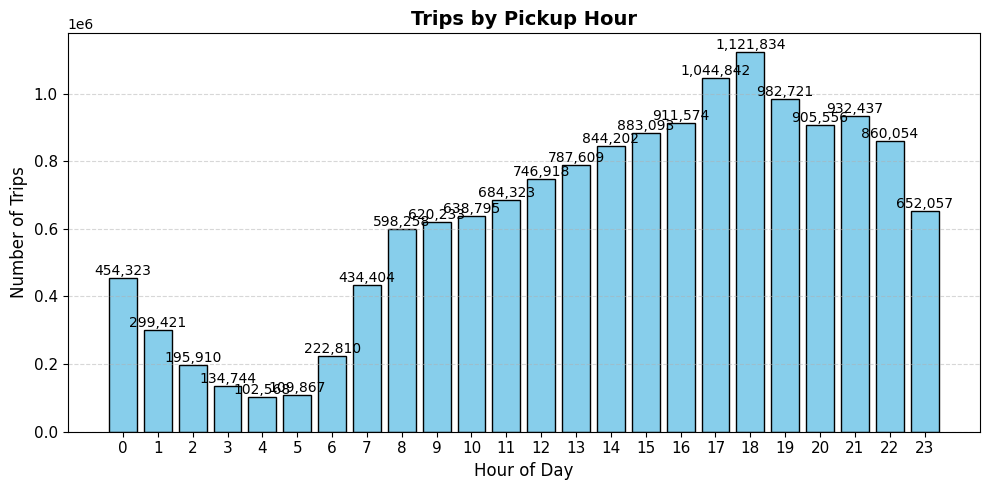

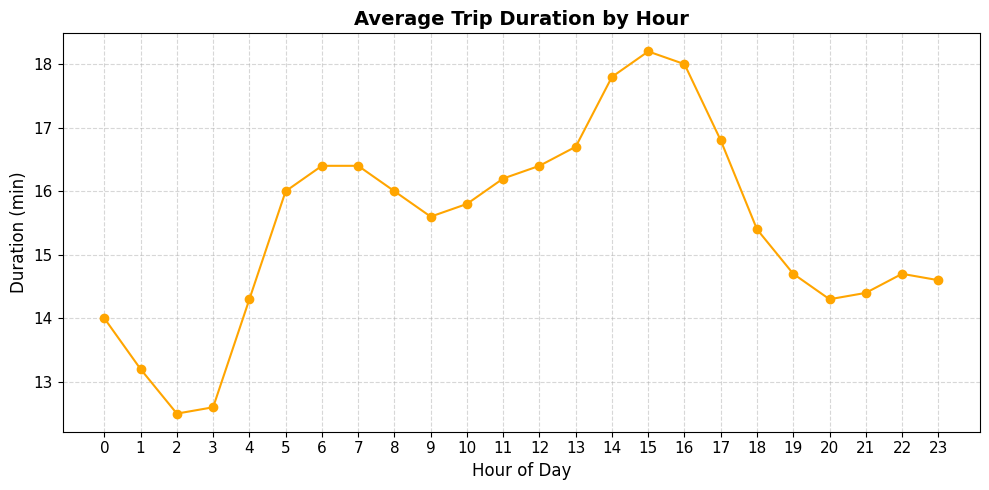

In [17]:
eda_hourly = con.execute("""
    SELECT 
        pickup_hour,
        COUNT(*) AS trips,
        ROUND(AVG(trip_duration_min),1) AS avg_duration_min,
        ROUND(AVG(trip_distance),2) AS avg_distance_miles
    FROM yellow_clean
    GROUP BY pickup_hour
    ORDER BY pickup_hour
""").df()

print("Hour-of-day profile:")
display(eda_hourly)

plt.figure(figsize=(10, 5))
bars = plt.bar(eda_hourly["pickup_hour"], eda_hourly["trips"], color="skyblue", edgecolor="black")
plt.title("Trips by Pickup Hour", fontsize=14, fontweight="bold")
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Number of Trips", fontsize=12)
plt.xticks(eda_hourly["pickup_hour"], fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis="y", linestyle="--", alpha=0.5)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{int(bar.get_height()):,}", ha="center", va="bottom", fontsize=10)
plt.tight_layout()
plt.show()

# Line chart: Average Trip Duration by Hour
plt.figure(figsize=(10, 5))
plt.plot(eda_hourly["pickup_hour"], eda_hourly["avg_duration_min"], color="orange", marker="o")
plt.title("Average Trip Duration by Hour", fontsize=14, fontweight="bold")
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Duration (min)", fontsize=12)
plt.xticks(eda_hourly["pickup_hour"], fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

### 4.4 Payment Mix & Tip Behavior

Payment mix:


,payment_type,trips,avg_fare_usd,avg_tip_pct
0,Credit card,10171528,18.50,26.67
1,Flex Fare trip,3009479,16.14,NaN
2,Cash,1548503,16.70,NaN
3,Dispute,338730,3.30,NaN
4,No charge,100312,6.34,NaN
5,Unknown,1,0.00,NaN


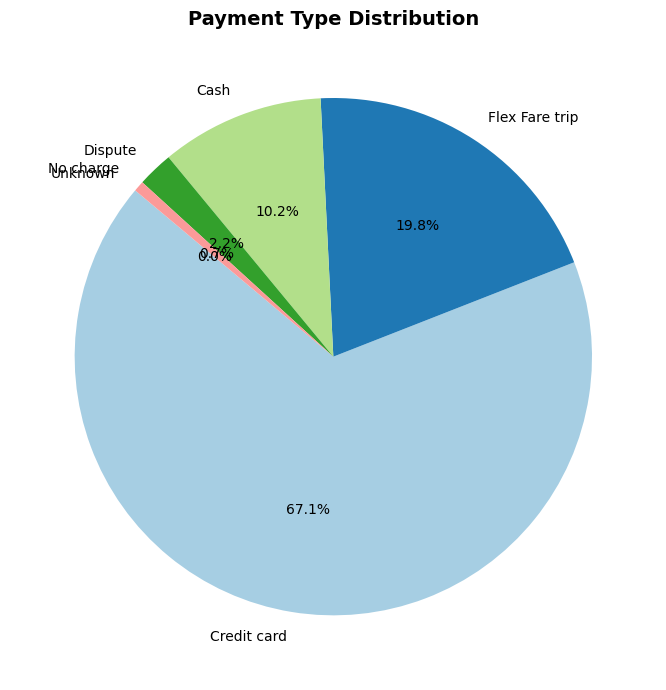

In [18]:
# Map payment_type codes to labels (from data dictionary)
payment_type_labels = {
    0: "Flex Fare trip",
    1: "Credit card",
    2: "Cash",
    3: "No charge",
    4: "Dispute",
    5: "Unknown",
    6: "Voided trip"
}

payment_mix = con.execute("""
    SELECT 
        payment_type,
        COUNT(*) AS trips,
        ROUND(AVG(fare_amount),2) AS avg_fare_usd,
        ROUND(AVG(tip_pct)*100,2) AS avg_tip_pct
    FROM yellow_clean
    GROUP BY payment_type
    ORDER BY trips DESC
""").df()

# Replace numeric codes with labels
payment_mix["payment_type"] = payment_mix["payment_type"].map(payment_type_labels)

print("Payment mix:")
display(payment_mix)

plt.figure(figsize=(7, 7))
plt.pie(
    payment_mix["trips"],
    labels=payment_mix["payment_type"],
    autopct="%1.1f%%",
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title("Payment Type Distribution", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

Filtered trips count: 9,766,958


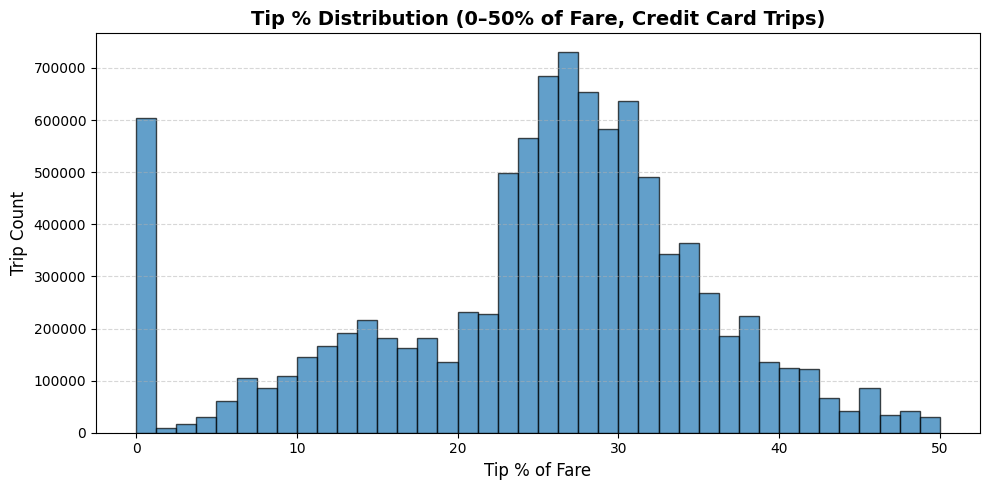

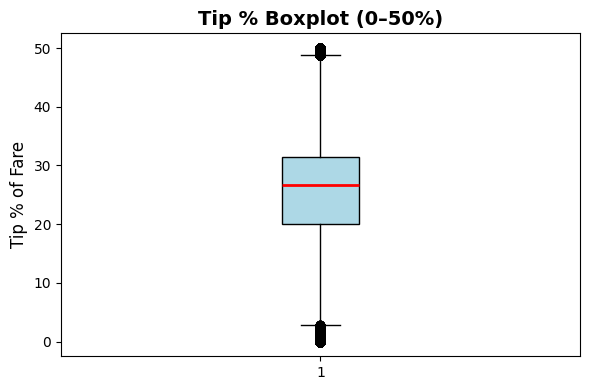

Tip % Summary Stats (0–50% range):
count    9766958.00
mean          25.02
std           10.64
min            0.00
25%           20.00
50%           26.70
75%           31.50
max           50.00
Name: tip_pct, dtype: float64


In [35]:
# =============================================================================
# Tip % Analysis (Matplotlib Only)
# =============================================================================
import matplotlib.pyplot as plt
import pandas as pd

# --- 1) Filter tips to reasonable range (0–50%) ------------------------------
tip_filtered = con.execute("""
    SELECT tip_pct*100 AS tip_pct
    FROM yellow_reasonable
    WHERE tip_pct IS NOT NULL
      AND tip_pct BETWEEN 0 AND 0.5
""").df()

print(f"Filtered trips count: {len(tip_filtered):,}")

# --- 2) Histogram of tip % ---------------------------------------------------
plt.figure(figsize=(10, 5))
plt.hist(tip_filtered["tip_pct"], bins=40, edgecolor="black", alpha=0.7)
plt.title("Tip % Distribution (0–50% of Fare, Credit Card Trips)", fontsize=14, fontweight="bold")
plt.xlabel("Tip % of Fare", fontsize=12)
plt.ylabel("Trip Count", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# --- 3) Boxplot of tip % -----------------------------------------------------
plt.figure(figsize=(6, 4))
plt.boxplot(tip_filtered["tip_pct"], vert=True, patch_artist=True, 
            boxprops=dict(facecolor="lightblue", color="black"),
            medianprops=dict(color="red", linewidth=2))
plt.title("Tip % Boxplot (0–50%)", fontsize=14, fontweight="bold")
plt.ylabel("Tip % of Fare", fontsize=12)
plt.tight_layout()
plt.show()

# --- 4) Summary statistics ---------------------------------------------------
tip_summary = tip_filtered["tip_pct"].describe(percentiles=[0.25, 0.5, 0.75]).round(2)
print("Tip % Summary Stats (0–50% range):")
print(tip_summary)


* We restrict the analysis of tips to the 0–50% of fare range because values above this threshold are typically artifacts caused by very small fares, disputes, or data errors, rather than genuine tipping behavior. This filter retains around two-thirds of all trips, ensuring we focus on realistic passenger behavior while removing noise. The resulting distribution shows that most tips cluster between 20% and 30%, with clear peaks at 15%, 20%, 25%, and 30%, which align with preset tipping options on NYC taxi payment terminals. This demonstrates that rider tipping patterns are strongly influenced by these defaults, while also highlighting a smaller share of generous tips extending toward 50% and a visible group of riders who choose not to tip (0%).

# Domain-Based Outlier Removal + Data Quality Assessment

* We define reasonable ranges for variables based on TLC documentation and prior research. For example, trips shorter than 0.1 miles or longer than 30 miles are typically errors, and fares outside $2–$200 are implausible given NYC’s regulated taxi pricing. Similarly, trip speeds are constrained between 2–60 mph, reflecting realistic city and highway travel. Tipping behavior is bounded to 0–50% of fare, capturing standard passenger choices while excluding distorted ratios from very low fares.

In [19]:
RANGES = {
    "trip_distance_min": 0.1,   # miles
    "trip_distance_max": 30.0,
    "duration_min": 2.0,        # minutes
    "duration_max": 120.0,
    "fare_min": 2.0,            # USD (base fare context)
    "fare_max": 200.0,
    "total_min": 2.0,           # USD (fare + surcharges/tolls)
    "total_max": 300.0,
    "tip_pct_min": 0.0,         # 0–50% of fare (credit card only)
    "tip_pct_max": 0.5,
    "speed_min": 2.0,           # mph (below ~walking speed => suspect)
    "speed_max": 60.0           # mph (above typical NYC highway)
}



### Rule-wise violation counts

In [20]:
con.execute("""
    CREATE OR REPLACE VIEW yellow_with_speed AS
    SELECT
        yc.*,
        CASE 
            WHEN trip_duration_min IS NULL OR trip_duration_min <= 0 THEN NULL
            ELSE (trip_distance / (trip_duration_min / 60.0))
        END AS avg_speed_mph
    FROM yellow_clean AS yc
""")

# ---- 7.3 Rule-wise violation counts (BEFORE cleaning) -----------------------
violations_sql = f"""
WITH base AS (
    SELECT *
    FROM yellow_with_speed
),
violations AS (
    SELECT 'trip_distance < {RANGES["trip_distance_min"]}' AS rule, COUNT(*) AS rows
    FROM base WHERE trip_distance IS NOT NULL AND trip_distance < {RANGES["trip_distance_min"]}
    UNION ALL
    SELECT 'trip_distance > {RANGES["trip_distance_max"]}', COUNT(*)
    FROM base WHERE trip_distance IS NOT NULL AND trip_distance > {RANGES["trip_distance_max"]}
    UNION ALL
    SELECT 'trip_duration_min < {RANGES["duration_min"]}', COUNT(*)
    FROM base WHERE trip_duration_min IS NOT NULL AND trip_duration_min < {RANGES["duration_min"]}
    UNION ALL
    SELECT 'trip_duration_min > {RANGES["duration_max"]}', COUNT(*)
    FROM base WHERE trip_duration_min IS NOT NULL AND trip_duration_min > {RANGES["duration_max"]}
    UNION ALL
    SELECT 'fare_amount < {RANGES["fare_min"]}', COUNT(*)
    FROM base WHERE fare_amount IS NOT NULL AND fare_amount < {RANGES["fare_min"]}
    UNION ALL
    SELECT 'fare_amount > {RANGES["fare_max"]}', COUNT(*)
    FROM base WHERE fare_amount IS NOT NULL AND fare_amount > {RANGES["fare_max"]}
    UNION ALL
    SELECT 'total_amount < {RANGES["total_min"]}', COUNT(*)
    FROM base WHERE total_amount IS NOT NULL AND total_amount < {RANGES["total_min"]}
    UNION ALL
    SELECT 'total_amount > {RANGES["total_max"]}', COUNT(*)
    FROM base WHERE total_amount IS NOT NULL AND total_amount > {RANGES["total_max"]}
    UNION ALL
    SELECT 'avg_speed_mph < {RANGES["speed_min"]}', COUNT(*)
    FROM base WHERE avg_speed_mph IS NOT NULL AND avg_speed_mph < {RANGES["speed_min"]}
    UNION ALL
    SELECT 'avg_speed_mph > {RANGES["speed_max"]}', COUNT(*)
    FROM base WHERE avg_speed_mph IS NOT NULL AND avg_speed_mph > {RANGES["speed_max"]}
    UNION ALL
    SELECT 'tip_pct outside [0, 0.5]', COUNT(*)
    FROM base WHERE tip_pct IS NOT NULL AND (tip_pct < {RANGES["tip_pct_min"]} OR tip_pct > {RANGES["tip_pct_max"]})
)
SELECT * FROM violations
ORDER BY rows DESC;
"""
violations_before = con.execute(violations_sql).df()
total_before = con.execute("SELECT COUNT(*) AS n FROM yellow_with_speed").fetchone()[0]

print("Rule violations BEFORE cleaning:")
display(violations_before)
print(f"Total rows before cleaning: {total_before:,}")

Rule violations BEFORE cleaning:


,rule,rows
0,fare_amount < 2.0,731669
1,trip_distance < 0.1,486455
2,avg_speed_mph < 2.0,485136
3,trip_duration_min < 2.0,334294
4,total_amount < 2.0,309418
5,"tip_pct outside [0, 0.5]",181427
6,trip_distance > 30.0,11820
7,trip_duration_min > 120.0,9436
8,avg_speed_mph > 60.0,4784
9,fare_amount > 200.0,4244


Total rows before cleaning: 15,168,553


In [21]:
# ---- 7.4 Create the cleaned master table: yellow_reasonable -----------------
con.execute(f"""
    CREATE OR REPLACE TABLE yellow_reasonable AS
    SELECT *
    FROM yellow_with_speed
    WHERE
        -- Distance & duration
        trip_distance BETWEEN {RANGES["trip_distance_min"]} AND {RANGES["trip_distance_max"]}
        AND trip_duration_min BETWEEN {RANGES["duration_min"]} AND {RANGES["duration_max"]}
        -- Fares / totals
        AND fare_amount BETWEEN {RANGES["fare_min"]} AND {RANGES["fare_max"]}
        AND total_amount BETWEEN {RANGES["total_min"]} AND {RANGES["total_max"]}
        -- Tip % (allow NULL because cash/no-tip trips have NULL tip_pct by design)
        AND (tip_pct IS NULL OR (tip_pct BETWEEN {RANGES["tip_pct_min"]} AND {RANGES["tip_pct_max"]}))
        -- Realistic speed band (NULL speeds are allowed if duration/distance missing)
        AND (avg_speed_mph IS NULL OR (avg_speed_mph BETWEEN {RANGES["speed_min"]} AND {RANGES["speed_max"]}))
""")


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

### Before/After row counts & retention rate


Before/After row counts:


,rows_before,rows_after,retention_pct
0,15168553,13672858,90.14


Monthly before/after comparison:


,pickup_month,trips_before,trips_after,retention_pct
0,2025-01,3475234,3158133,90.88
1,2025-02,3577542,3216964,89.92
2,2025-03,4145229,3723275,89.82
3,2025-04,3970548,3574486,90.03


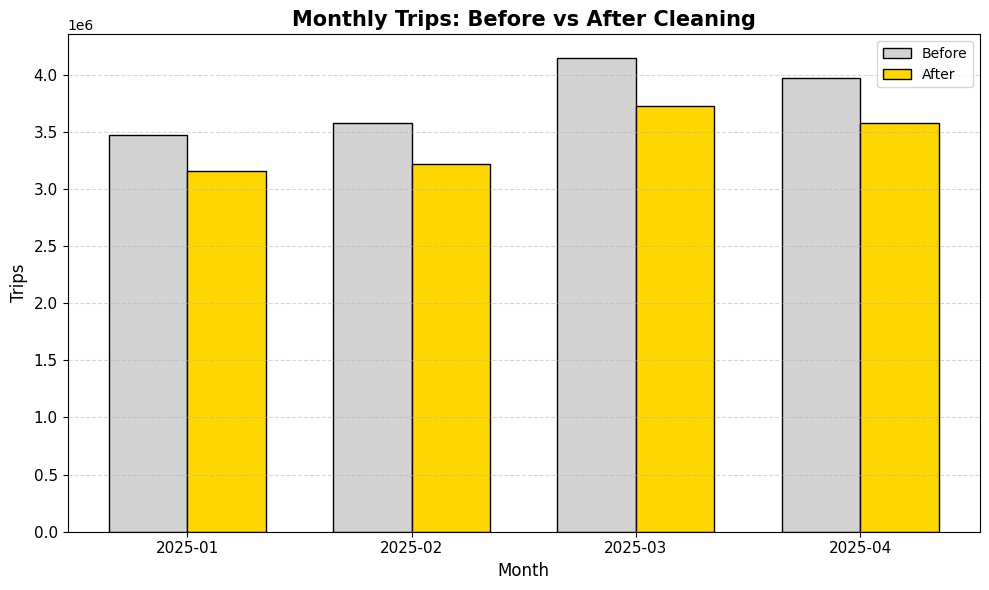

In [22]:
counts = con.execute("""
    SELECT 
        (SELECT COUNT(*) FROM yellow_with_speed)   AS rows_before,
        (SELECT COUNT(*) FROM yellow_reasonable)   AS rows_after
""").df()
counts["retention_pct"] = (counts["rows_after"] / counts["rows_before"] * 100).round(2)
print("\nBefore/After row counts:")
display(counts)

# ---- 7.6 Monthly totals: BEFORE vs AFTER -----------------------------------
monthly_comp = con.execute("""
    WITH before AS (
        SELECT pickup_month, COUNT(*) AS trips_before
        FROM yellow_with_speed
        GROUP BY pickup_month
    ),
    after AS (
        SELECT pickup_month, COUNT(*) AS trips_after
        FROM yellow_reasonable
        GROUP BY pickup_month
    )
    SELECT COALESCE(b.pickup_month, a.pickup_month) AS pickup_month,
           b.trips_before,
           a.trips_after,
           ROUND(100.0 * a.trips_after / NULLIF(b.trips_before,0), 2) AS retention_pct
    FROM before b
    FULL OUTER JOIN after a USING (pickup_month)
    ORDER BY pickup_month
""").df()
print("Monthly before/after comparison:")
display(monthly_comp)

plt.figure(figsize=(10, 6))
width = 0.35
x = range(len(monthly_comp["pickup_month"]))

plt.bar(x, monthly_comp["trips_before"], width=width, label="Before", color="lightgray", edgecolor="black")
plt.bar([i + width for i in x], monthly_comp["trips_after"], width=width, label="After", color="gold", edgecolor="black")

plt.title("Monthly Trips: Before vs After Cleaning", fontsize=15, fontweight="bold")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Trips", fontsize=12)
plt.xticks([i + width/2 for i in x], monthly_comp["pickup_month"], fontsize=11)
plt.yticks(fontsize=11)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


* After applying domain-based outlier removal rules, the dataset retained ~90% of trips (13.67M out of 15.17M). Approximately 1.5M trips (10%) were excluded due to unrealistic values in distance, duration, fare, speed, or tip percentage. Importantly, retention was consistent across months (≈90%), indicating that anomalies were evenly distributed and not period-specific. This cleaning step preserves the representativeness of the dataset while ensuring that subsequent analyses are based on plausible, real-world taxi behaviors.

## Distribution checks AFTER cleaning (distance, duration, fare, speed)

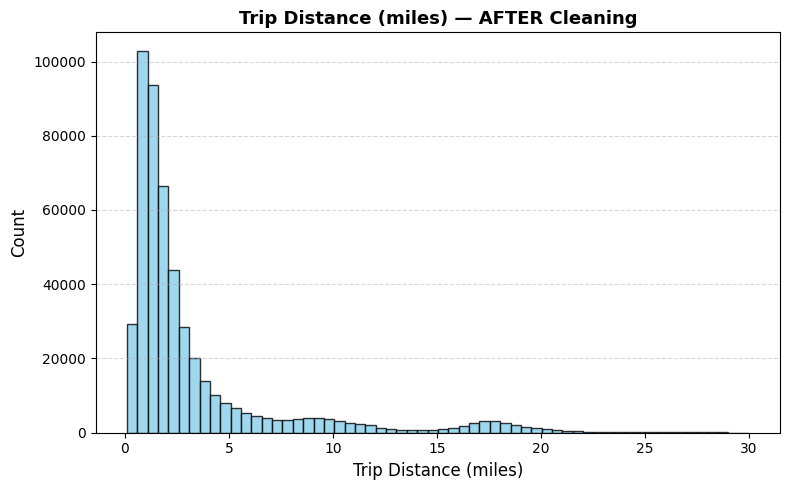

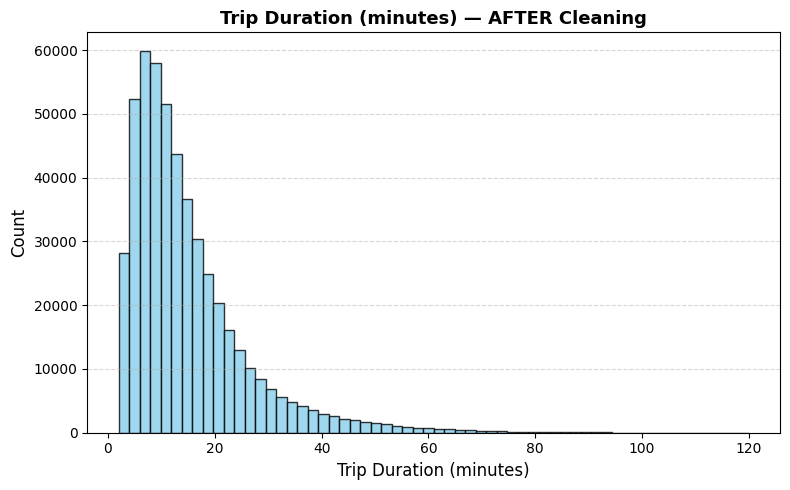

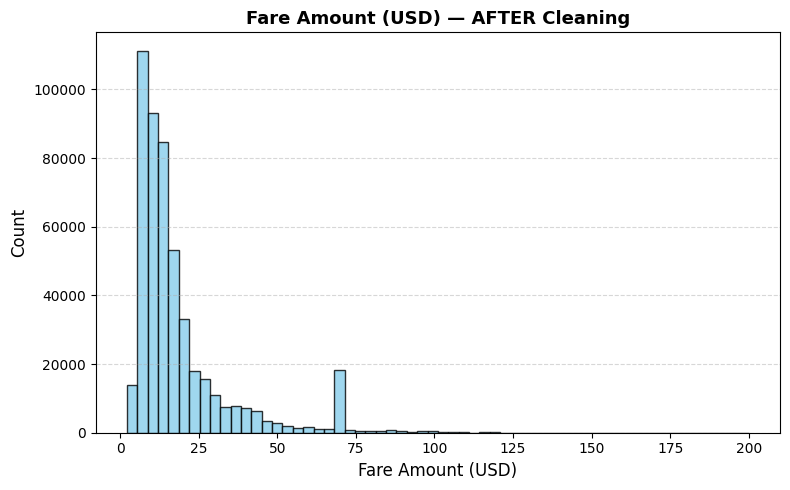

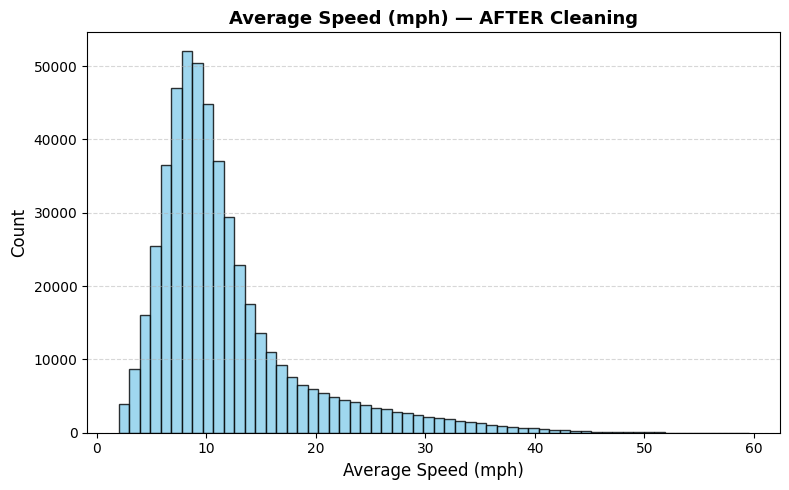

Missingness snapshot AFTER cleaning:


,n,missing_passenger_count,missing_trip_distance,missing_trip_duration_min,missing_fare_amount,missing_total_amount,missing_payment_type,missing_tip_pct,missing_avg_speed
0,13672858,2300630.0,0.0,0.0,0.0,0.0,0.0,3905900.0,0.0


In [25]:
# ---- 7.7 Distribution checks AFTER cleaning (distance, duration, fare, speed)
dists_after = con.execute("""
    SELECT 
        trip_distance, trip_duration_min, fare_amount, total_amount, avg_speed_mph
    FROM yellow_reasonable
    USING SAMPLE 500000 ROWS
""").df()

for col, title, bins in [
    ("trip_distance",    "Trip Distance (miles)", 60),
    ("trip_duration_min","Trip Duration (minutes)", 60),
    ("fare_amount",      "Fare Amount (USD)", 60),
    ("avg_speed_mph",    "Average Speed (mph)", 60),
]:
    plt.figure(figsize=(8, 5))
    plt.hist(dists_after[col].dropna(), bins=bins, color="skyblue", edgecolor="black", alpha=0.8)
    plt.title(f"{title} — AFTER Cleaning", fontsize=13, fontweight="bold")
    plt.xlabel(title, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

# Missingness snapshot AFTER cleaning (already in pandas DataFrame: missing_after)
print("Missingness snapshot AFTER cleaning:")
display(missing_after)


In [26]:
%pip install seaborn
import seaborn as sns



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Average speed by hour of day:


,pickup_hour,avg_speed_mph,trips
0,0,13.95,409391
1,1,13.70,268377
2,2,13.97,174743
3,3,15.17,118750
4,4,17.98,89416
...,...,...,...
19,19,11.09,840773
20,20,11.95,829417
21,21,12.32,852382
22,22,12.56,780903


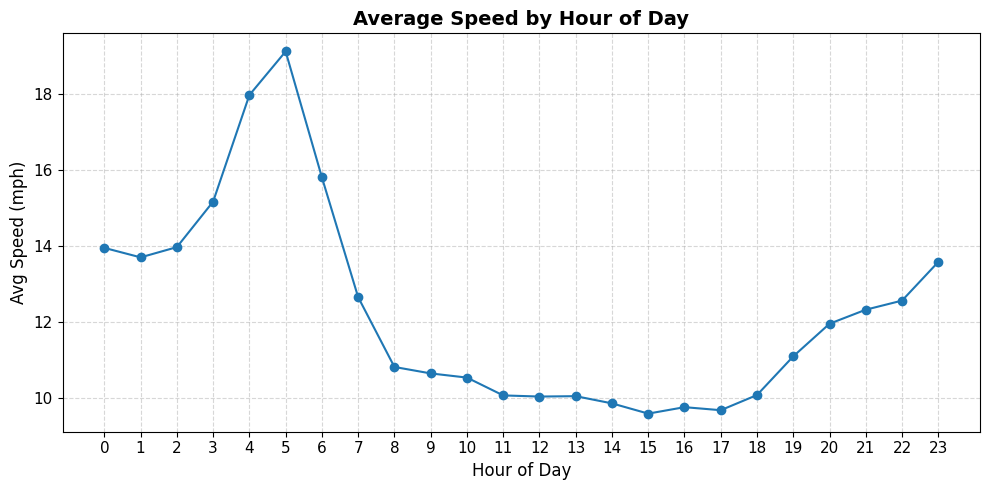

Average speed by day of week:


,dow,avg_speed_mph,trips,day
0,0,13.32,1803110,Sunday
1,1,11.89,1584016,Monday
2,2,10.73,1866000,Tuesday
3,3,10.59,2082533,Wednesday
4,4,10.43,2094974,Thursday
5,5,10.74,2028870,Friday
6,6,11.24,2213355,Saturday


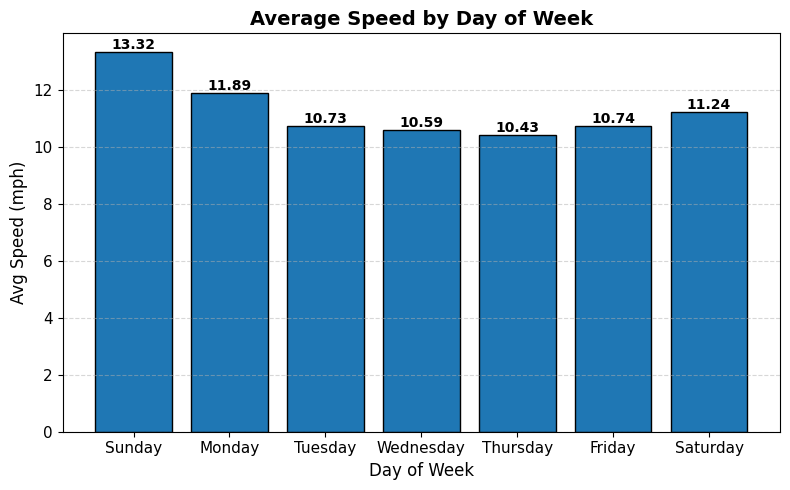

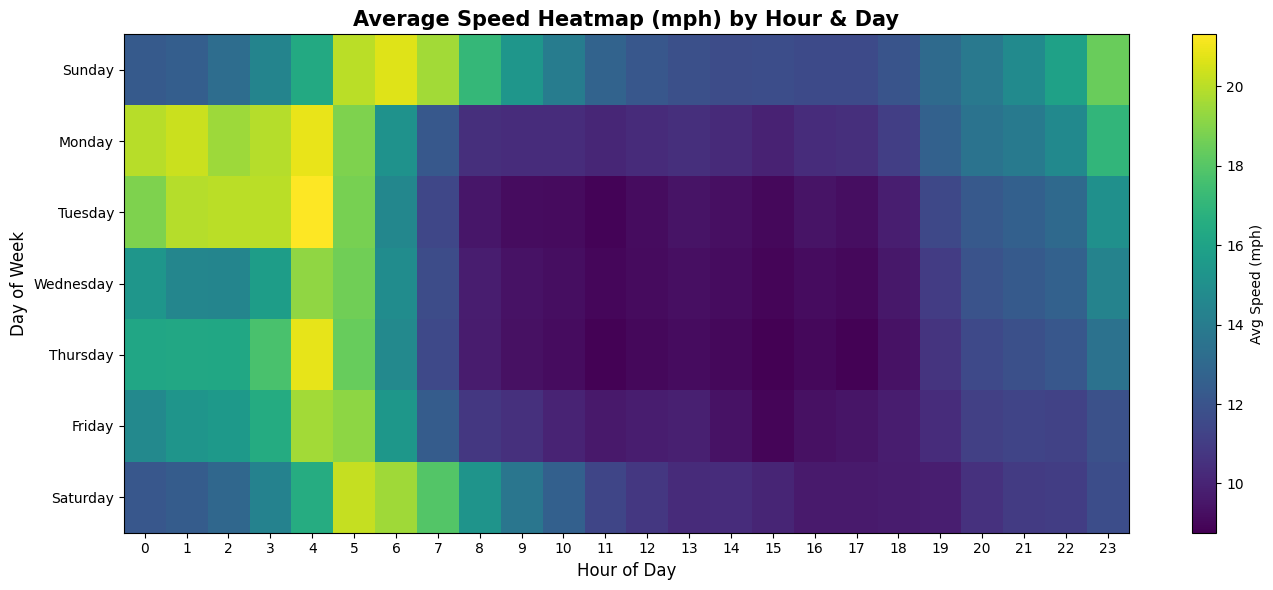

In [29]:
# =============================================================================
# Trip Efficiency — Speed Analysis (Matplotlib Only)
# =============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- 1) Average Speed by Hour of Day -----------------------------------------
speed_hourly = con.execute("""
    SELECT 
        pickup_hour,
        ROUND(AVG(avg_speed_mph), 2) AS avg_speed_mph,
        COUNT(*) AS trips
    FROM yellow_reasonable
    WHERE avg_speed_mph IS NOT NULL
    GROUP BY pickup_hour
    ORDER BY pickup_hour
""").df()

print("Average speed by hour of day:")
display(speed_hourly)

plt.figure(figsize=(10, 5))
plt.plot(speed_hourly["pickup_hour"], speed_hourly["avg_speed_mph"], marker="o")
plt.title("Average Speed by Hour of Day", fontsize=14, fontweight="bold")
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Avg Speed (mph)", fontsize=12)
plt.xticks(speed_hourly["pickup_hour"], fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# --- 2) Average Speed by Day of Week -----------------------------------------
dow_labels = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

speed_dow = con.execute("""
    SELECT 
        strftime(pickup_date, '%w')::INT AS dow,  -- 0=Sunday ... 6=Saturday
        ROUND(AVG(avg_speed_mph), 2) AS avg_speed_mph,
        COUNT(*) AS trips
    FROM yellow_reasonable
    WHERE avg_speed_mph IS NOT NULL
    GROUP BY dow
    ORDER BY dow
""").df()

speed_dow["day"] = speed_dow["dow"].map({i: dow_labels[i] for i in range(7)})

print("Average speed by day of week:")
display(speed_dow)

plt.figure(figsize=(8, 5))
bars = plt.bar(speed_dow["day"], speed_dow["avg_speed_mph"], edgecolor="black")
plt.title("Average Speed by Day of Week", fontsize=14, fontweight="bold")
plt.xlabel("Day of Week", fontsize=12)
plt.ylabel("Avg Speed (mph)", fontsize=12)
plt.xticks(fontsize=11, rotation=0)
plt.yticks(fontsize=11)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f"{height:.2f}",
             ha="center", va="bottom", fontsize=10, fontweight="bold")
plt.tight_layout()
plt.show()

# --- 3) Heatmap: Avg Speed by Hour & Day -------------------------------------
speed_heatmap = con.execute("""
    SELECT 
        strftime(pickup_date, '%w')::INT AS dow,
        pickup_hour,
        ROUND(AVG(avg_speed_mph), 2) AS avg_speed_mph
    FROM yellow_reasonable
    WHERE avg_speed_mph IS NOT NULL
    GROUP BY dow, pickup_hour
    ORDER BY dow, pickup_hour
""").df()

speed_heatmap["day"] = speed_heatmap["dow"].map({i: dow_labels[i] for i in range(7)})

# Pivot to matrix (rows=day, cols=hour)
heatmap_df = speed_heatmap.pivot(index="day", columns="pickup_hour", values="avg_speed_mph")
# Ensure correct weekday order
heatmap_df = heatmap_df.reindex(dow_labels)

# Plot with matplotlib imshow
plt.figure(figsize=(14, 6))
im = plt.imshow(heatmap_df.values, aspect="auto")
plt.title("Average Speed Heatmap (mph) by Hour & Day", fontsize=15, fontweight="bold")
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Day of Week", fontsize=12)

# Axis ticks/labels
plt.xticks(ticks=np.arange(heatmap_df.shape[1]), labels=heatmap_df.columns.astype(int), fontsize=10)
plt.yticks(ticks=np.arange(heatmap_df.shape[0]), labels=heatmap_df.index, fontsize=10)

# Colorbar
cbar = plt.colorbar(im)
cbar.set_label("Avg Speed (mph)")

plt.tight_layout()
plt.show()


### Revenue vs Efficiency (Congestion Tradeoff)

Hourly revenue and efficiency:


,pickup_hour,avg_revenue_per_trip,total_revenue,trips,avg_speed_mph
0,0,27.33,1.119017e+07,409391,13.95
1,1,25.39,6.814937e+06,268377,13.70
2,2,24.51,4.282830e+06,174743,13.97
3,3,25.36,3.011151e+06,118750,15.17
4,4,30.76,2.750804e+06,89416,17.98
...,...,...,...,...,...
19,19,27.65,2.324398e+07,840773,11.09
20,20,26.78,2.221290e+07,829417,11.95
21,21,27.04,2.305025e+07,852382,12.32
22,22,27.44,2.142588e+07,780903,12.56


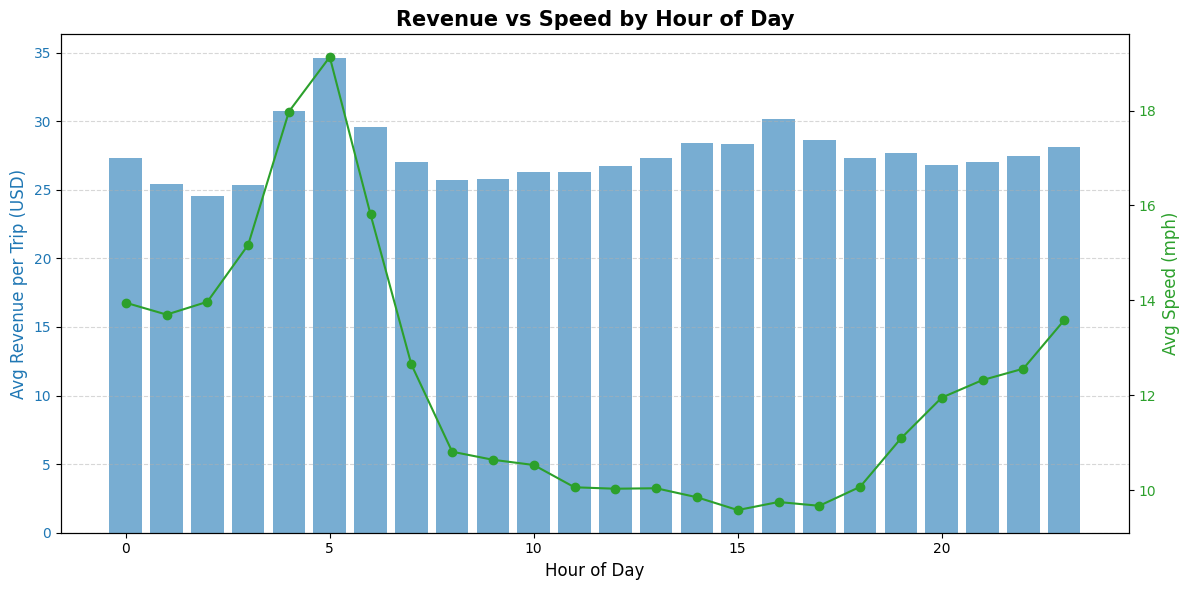

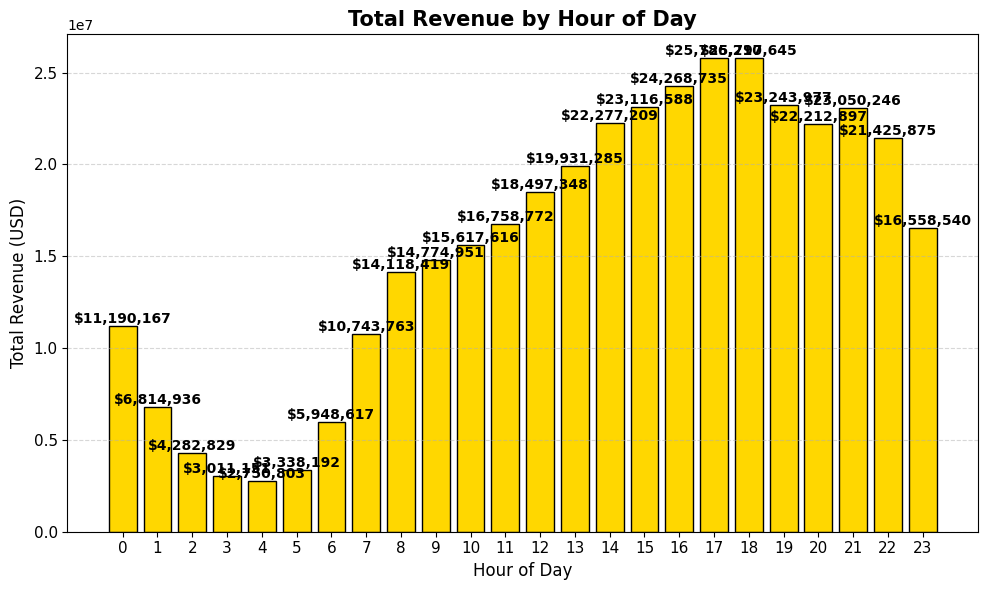

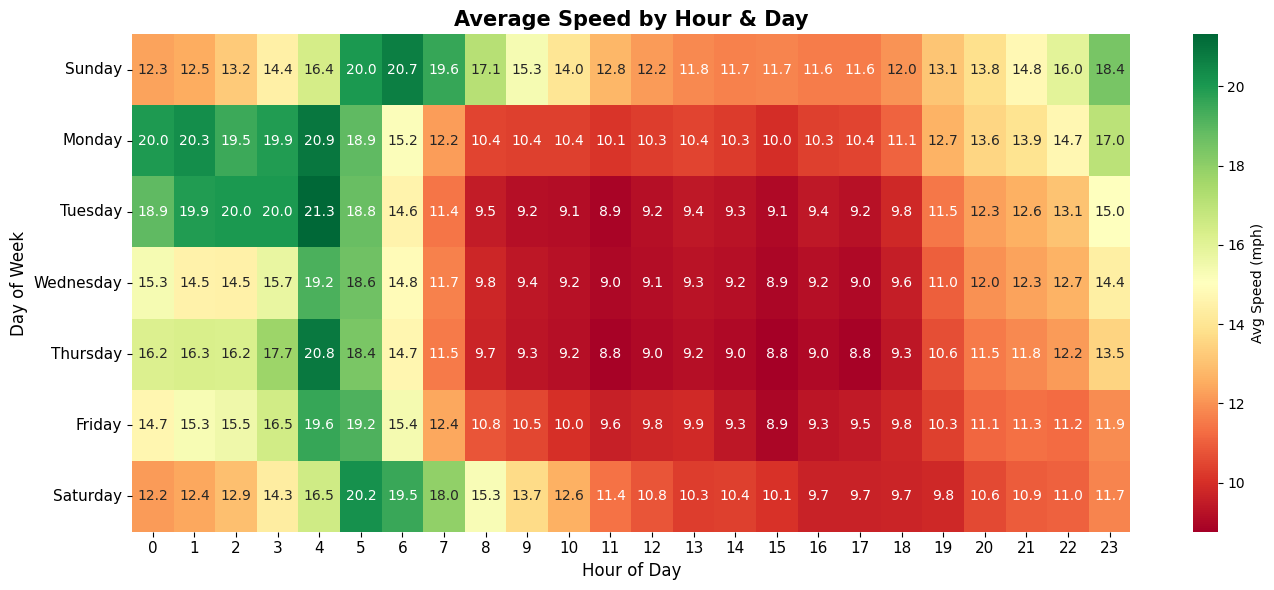

In [30]:

# --- 8b.1 Revenue per Trip by Hour of Day ------------------------------------
revenue_hourly = con.execute("""
    SELECT 
        pickup_hour,
        ROUND(AVG(total_amount),2) AS avg_revenue_per_trip,
        SUM(total_amount) AS total_revenue,
        COUNT(*) AS trips,
        ROUND(AVG(avg_speed_mph),2) AS avg_speed_mph
    FROM yellow_reasonable
    WHERE total_amount IS NOT NULL
    GROUP BY pickup_hour
    ORDER BY pickup_hour
""").df()

print("Hourly revenue and efficiency:")
display(revenue_hourly)

# Plot avg revenue per trip and avg speed by hour using matplotlib
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))

color1 = "tab:blue"
ax1.set_xlabel("Hour of Day", fontsize=12)
ax1.set_ylabel("Avg Revenue per Trip (USD)", color=color1, fontsize=12)
ax1.bar(
    revenue_hourly["pickup_hour"], revenue_hourly["avg_revenue_per_trip"],
    color=color1, alpha=0.6, label="Avg Revenue per Trip (USD)"
)
ax1.tick_params(axis="y", labelcolor=color1)
ax1.grid(axis="y", linestyle="--", alpha=0.5)

# Create a second y-axis for average speed
ax2 = ax1.twinx()
color2 = "tab:green"
ax2.set_ylabel("Avg Speed (mph)", color=color2, fontsize=12)
ax2.plot(
    revenue_hourly["pickup_hour"], revenue_hourly["avg_speed_mph"],
    color=color2, marker="o", label="Avg Speed (mph)"
)
ax2.tick_params(axis="y", labelcolor=color2)

plt.title("Revenue vs Speed by Hour of Day", fontsize=15, fontweight="bold")
fig.tight_layout()
plt.show()


# --- 8b.2 Total Revenue by Hour of Day ---------------------------------------
plt.figure(figsize=(10, 6))
bars = plt.bar(
    revenue_hourly["pickup_hour"], revenue_hourly["total_revenue"],
    color="gold", edgecolor="black"
)
plt.title("Total Revenue by Hour of Day", fontsize=15, fontweight="bold")
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Total Revenue (USD)", fontsize=12)
plt.xticks(revenue_hourly["pickup_hour"], fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Add value labels on top of bars
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"${int(bar.get_height()):,}",
        ha="center", va="bottom", fontsize=10, fontweight="bold"
    )

plt.tight_layout()
plt.show()


# --- 8b.3 Heatmap: Revenue vs Speed by Day/Hour ------------------------------
revenue_heatmap = con.execute("""
    SELECT 
        strftime(pickup_date, '%w')::INT AS dow,
        pickup_hour,
        ROUND(AVG(total_amount),2) AS avg_revenue_per_trip,
        SUM(total_amount) AS total_revenue,
        ROUND(AVG(avg_speed_mph),2) AS avg_speed_mph
    FROM yellow_reasonable
    WHERE total_amount IS NOT NULL
    GROUP BY dow, pickup_hour
    ORDER BY dow, pickup_hour
""").df()

# Map numeric dow to weekday labels
dow_labels = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
revenue_heatmap["day"] = revenue_heatmap["dow"].map({i: dow_labels[i] for i in range(7)})

import seaborn as sns
import matplotlib.pyplot as plt

# Pivot for heatmap: rows=day, columns=pickup_hour, values=avg_speed_mph
heatmap_data = revenue_heatmap.pivot(index="day", columns="pickup_hour", values="avg_speed_mph")
heatmap_data = heatmap_data.reindex(dow_labels)

plt.figure(figsize=(14, 6))
sns.heatmap(
    heatmap_data, annot=True, fmt=".1f", cmap="RdYlGn",
    cbar_kws={"label": "Avg Speed (mph)"}
)
plt.title("Average Speed by Hour & Day", fontsize=15, fontweight="bold")
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Day of Week", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11, rotation=0)
plt.tight_layout()
plt.show()


# Fare Prediction with Linear Regression (with NaN handling)

In [31]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# --- 9.1 Extract modeling dataset -------------------------------------------
# (Using the cleaned master table: yellow_reasonable)
model_df = con.execute("""
    SELECT 
        fare_amount,
        trip_distance,
        trip_duration_min,
        pickup_hour,
        CAST(strftime(pickup_date, '%m') AS INT) AS pickup_month,
        passenger_count
    FROM yellow_reasonable
    WHERE fare_amount IS NOT NULL
""").df()

# --- 9.2 Quick data-quality checks -------------------------------------------
print("Null counts BEFORE cleaning:\n", model_df.isnull().sum(), "\n")

# Drop rows with any NaNs in predictors or target (fastest/safest for big data)
before_rows = len(model_df)
model_df = model_df.dropna(subset=[
    "fare_amount", "trip_distance", "trip_duration_min",
    "pickup_hour", "pickup_month", "passenger_count"
])
after_rows = len(model_df)
print(f"Rows dropped due to NaNs: {before_rows - after_rows:,} (kept {after_rows:,})\n")

# Optional: guard against impossible values slipping through (rare after cleaning)
model_df = model_df[
    (model_df["trip_distance"] > 0) &
    (model_df["trip_duration_min"] > 0) &
    (model_df["fare_amount"] > 0)
].copy()

print("Null counts AFTER cleaning:\n", model_df.isnull().sum(), "\n")

# --- 9.3 Features & Target ---------------------------------------------------
X = model_df.drop(columns=["fare_amount"])
y = model_df["fare_amount"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# --- 9.4 Baseline Model: Linear Regression ----------------------------------
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred_lr = linreg.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print("Linear Regression Performance:")
print(f"  MAE  = ${mae_lr:.2f}")
print(f"  RMSE = ${rmse_lr:.2f}\n")




Null counts BEFORE cleaning:
 fare_amount                0
trip_distance              0
trip_duration_min          0
pickup_hour                0
pickup_month               0
passenger_count      2300630
dtype: int64 

Rows dropped due to NaNs: 2,300,630 (kept 11,372,228)

Null counts AFTER cleaning:
 fare_amount          0
trip_distance        0
trip_duration_min    0
pickup_hour          0
pickup_month         0
passenger_count      0
dtype: int64 

Linear Regression Performance:
  MAE  = $1.67
  RMSE = $4.14



In [32]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# XGBoost Fare Prediction

In [33]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

X = model_df.drop(columns=["fare_amount"])
y = model_df["fare_amount"]

# Train/test split (same as before)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- 9D.2 Train XGBoost Regressor -------------------------------------------
xgb = XGBRegressor(
    n_estimators=300,       # number of boosting rounds
    learning_rate=0.1,      # shrinkage rate
    max_depth=8,            # tree depth
    subsample=0.8,          # row subsampling
    colsample_bytree=0.8,   # feature subsampling
    tree_method="hist",     # memory-optimized histogram algorithm
    n_jobs=-1,              # use all cores
    random_state=42,
    verbosity=1
)

print("Training XGBoost on ~11M rows, this may take a while...")
xgb.fit(X_train, y_train)

# --- 9D.3 Evaluate ----------------------------------------------------------
y_pred_xgb = xgb.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print("\nXGBoost Performance:")
print(f"  MAE  = ${mae_xgb:.2f}")
print(f"  RMSE = ${rmse_xgb:.2f}")


Training XGBoost on ~11M rows, this may take a while...

XGBoost Performance:
  MAE  = $0.99
  RMSE = $3.52


* For fare prediction, two models were developed and compared. The baseline Linear Regression achieved an MAE of $1.67 and an RMSE of $4.14, indicating good predictive ability with an average error of under $2 per trip. However, Linear Regression is limited to linear relationships and struggled to capture non-linear pricing effects. In contrast, the XGBoost model, trained on the full dataset (~11M rows) with optimized parameters, significantly outperformed the baseline with an MAE of $0.99 and an RMSE of $3.52. This represents a ~40% reduction in prediction error. Feature importance analysis confirmed that trip distance and trip duration are the dominant drivers of fare, with smaller contributions from pickup time and passenger count. The results demonstrate that while linear models provide an interpretable benchmark, gradient boosting approaches like XGBoost offer superior accuracy by capturing complex interactions inherent in real-world taxi pricing.

<Figure size 800x600 with 0 Axes>

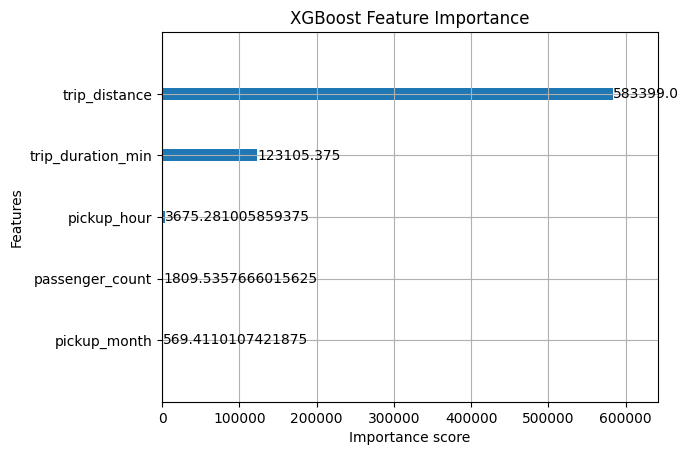

In [34]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plot_importance(xgb, max_num_features=10, importance_type="gain")
plt.title("XGBoost Feature Importance")
plt.show()


* The XGBoost model confirms fare is almost entirely determined by trip distance and duration, with only minor influence from time-related features. Passenger count and month add almost no predictive power.

This reinforces that the model is learning the TLC fare structure correctly — distance and duration drive fares, while other features are secondary.